In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = "C:/Users/chloe/Downloads/first_week.csv"
df = pd.read_csv(url)

In [115]:
df['arrival_delay_minutes'] = df['arrival_delay']/60

StopIteration: 

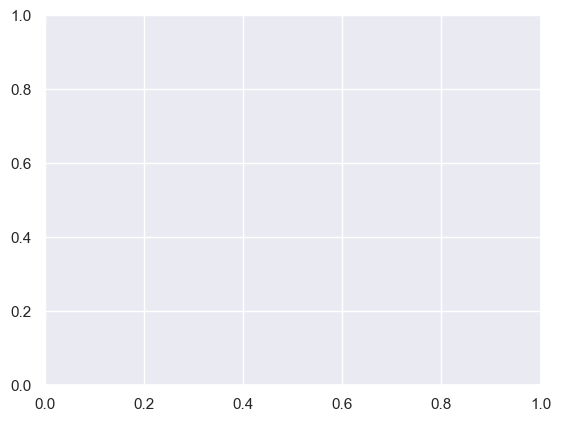

In [5]:

sns.set()
sns.histplot(x=df['arrival_delay_minutes'])

plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [116]:
df['arrival_delay_minutes'].describe()

count    33602.000000
mean         1.360881
std          2.741437
min       -110.433333
25%         -0.066667
50%          1.050000
75%          2.650000
max         18.200000
Name: arrival_delay_minutes, dtype: float64

In [117]:
df.columns

Index(['trip_id', 'start_date', 'schedule_relationship', 'stop_sequence_real',
       'stop_id', 'arrival_time_real', 'arrival_delay', 'departure_time_real',
       'departure_delay', 'route_short_name', 'service_id',
       'arrival_time_sched', 'departure_time_sched', 'stop_sequence_sched',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint', 'pickup_booking_rule_id', 'drop_off_booking_rule_id',
       'stop_name', 'stop_lat', 'stop_lon', 'location_type', 'parent_station',
       'platform_code', 'file', 'arrival_delay_minutes'],
      dtype='object')

In [118]:
df.loc[df['departure_time_real']=='2025-03-09 23:50:07']['arrival_time_real'].values[0]

'2025-03-09 23:49:59'

In [119]:
from datetime import datetime

In [120]:
df['departure_time_real'] = df['departure_time_real'].astype('str')
df['arrival_time_real'] = df['arrival_time_real'].astype('str')

In [121]:
def func(val):
    if isinstance(val, str) and val != 'nan':
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        return None

df['dwell_time'] = df['departure_time_real'].apply(func)-df['arrival_time_real'].apply(func)

In [87]:
df['dwell_time'].describe()

count                        33601
mean     0 days 00:00:25.932025832
std      0 days 00:01:05.761409644
min                0 days 00:00:00
25%                0 days 00:00:08
50%                0 days 00:00:14
75%                0 days 00:00:25
max                0 days 01:50:56
Name: dwell_time, dtype: object

In [12]:
df.head()

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,drop_off_booking_rule_id,stop_name,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time
0,14010000664357958,20250309,0,7,9022001010188001,2025-03-09 23:49:59,90.0,2025-03-09 23:50:07,98.0,61,...,NaN,Stadsbiblioteket,59.343836,18.054827,0,9.021001e+15,NaN,sl-tripupdates-2025-03-09T23-59-37Z.pb,1.500000,0 days 00:00:08
1,14010000664268451,20250309,0,12,9022001010383001,2025-03-09 23:50:01,2.0,2025-03-09 23:50:01,2.0,53,...,NaN,Tegelbacken,59.328257,18.062358,0,9.021001e+15,C,sl-tripupdates-2025-03-09T23-59-50Z.pb,0.033333,0 days 00:00:00
2,14010000664357819,20250309,0,18,9022001010583002,2025-03-09 23:49:06,-34.0,2025-03-09 23:49:06,-34.0,61,...,NaN,Fleminggatan,59.333282,18.045569,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-00-32Z.pb,-0.566667,0 days 00:00:00
3,14010000664357958,20250309,0,8,9022001010151001,2025-03-09 23:51:00,60.0,2025-03-09 23:51:08,68.0,61,...,NaN,Odenplan,59.342516,18.049194,0,9.021001e+15,G,sl-tripupdates-2025-03-10T00-00-46Z.pb,1.000000,0 days 00:00:08
4,14010000664357819,20250309,0,19,9022001010282001,2025-03-09 23:50:24,-39.0,2025-03-09 23:50:29,-34.0,61,...,NaN,Tegnérgatan,59.337624,18.049705,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-01-00Z.pb,-0.650000,0 days 00:00:05


In [95]:
df['stop_headsign'].unique()

array(['Hornsberg', 'Henriksdalsberget', 'Ruddammen',
       'Karolinska institutet', 'Sickla udde via Södersjukhuset',
       'Hornsberg via Södersjukhuset', 'Sickla udde'], dtype=object)

In [122]:
#exclusion des bus stops passant par l'arrêt bizarre
list_trip_id = []
def do_you_stop(u) :
  if u['stop_name']=='Södersjukhuset':
    list_trip_id.append(u['trip_id'])
  elif u['stop_headsign'] in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']:
    list_trip_id.append(u['trip_id'])
  return None

df.apply(do_you_stop, axis=1)
list_trip_id = list(set(list_trip_id))


In [89]:
df = df_ini

In [123]:
df_annoying = df.loc[(df['trip_id'].isin(list_trip_id) 
        & (~df['stop_name'].isin(['Södersjukhuset','Roselund','Södra station'])) 
        & (df['stop_headsign'].isin(['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset'])))]

def annoying_trips(u):
    if u['stop_headsign'] in ['Sickla udde via Södersjukhuset']:
        return 'Sickla udde'
    if u['stop_headsign'] in ['Hornsberg via Södersjukhuset']:
        return 'Hornsberg'
    else:
        return u['stop_headsign']
    
def annoying_sequences(u):
    if u['stop_headsign'] in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']:
        u['stop_sequence_real']+=1
        
    return None

df_annoying.apply(annoying_sequences, axis=1)

df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)

C:\Users\chloe\AppData\Local\Temp\ipykernel_45668\1755001313.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)


In [124]:

df_clean = pd.concat([df_annoying,df[~df['trip_id'].isin(list_trip_id)]])


In [125]:
#getting rid of the outliers : the whole trip when there is a problem on one stop

outi = []
def outlier_cleaning(u):
    if np.abs(u['arrival_delay_minutes'])>10:
        outi.append(u['trip_id'])
    return None
df_clean.apply(outlier_cleaning, axis=1)
outi= list(set(outi))
df_clean = df_clean[~df_clean['trip_id'].isin(outi)]


In [126]:
df_clean.to_csv('data_propres.csv')

In [112]:
#df_ini = df 
df = df_clean

In [100]:
len(df_ini.loc[df_ini['route_short_name']==74]['trip_id'].unique())

119

In [101]:
len(list(set(list_trip_id)))

59

74
Sickla udde
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
74
Hornsberg
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
61
Hornsberg
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3
  4  5  6]
61
Ruddammen
[18 19 20 21 22 23 24 25 26 27 28 29  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17]
53
Henriksdalsberget
[12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7  8  9 10 11]
53
Karolinska institutet
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7]


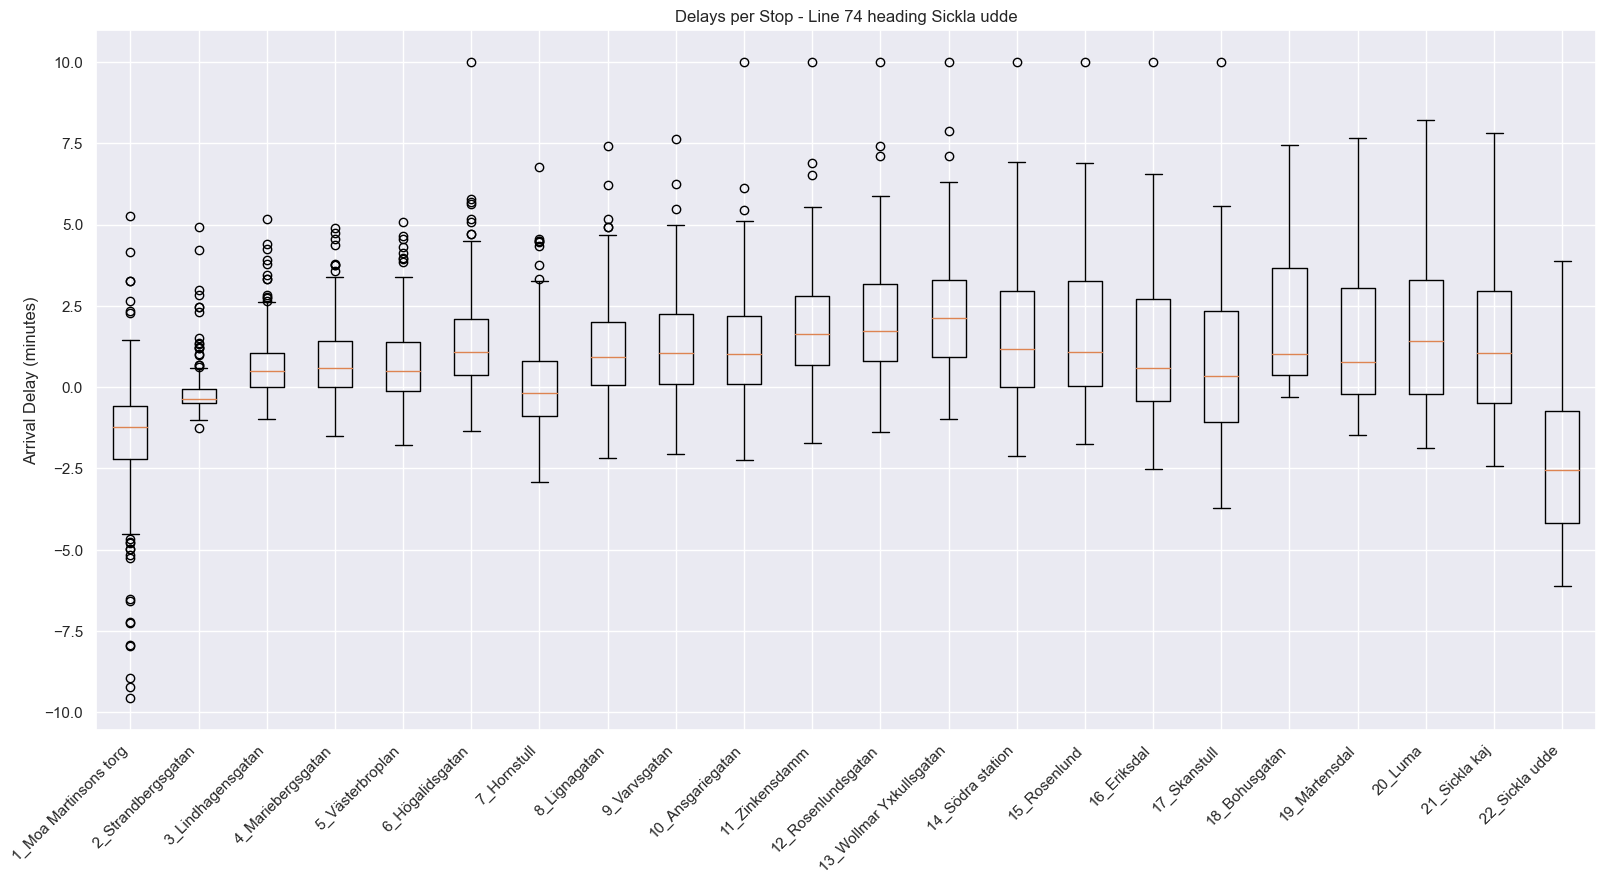

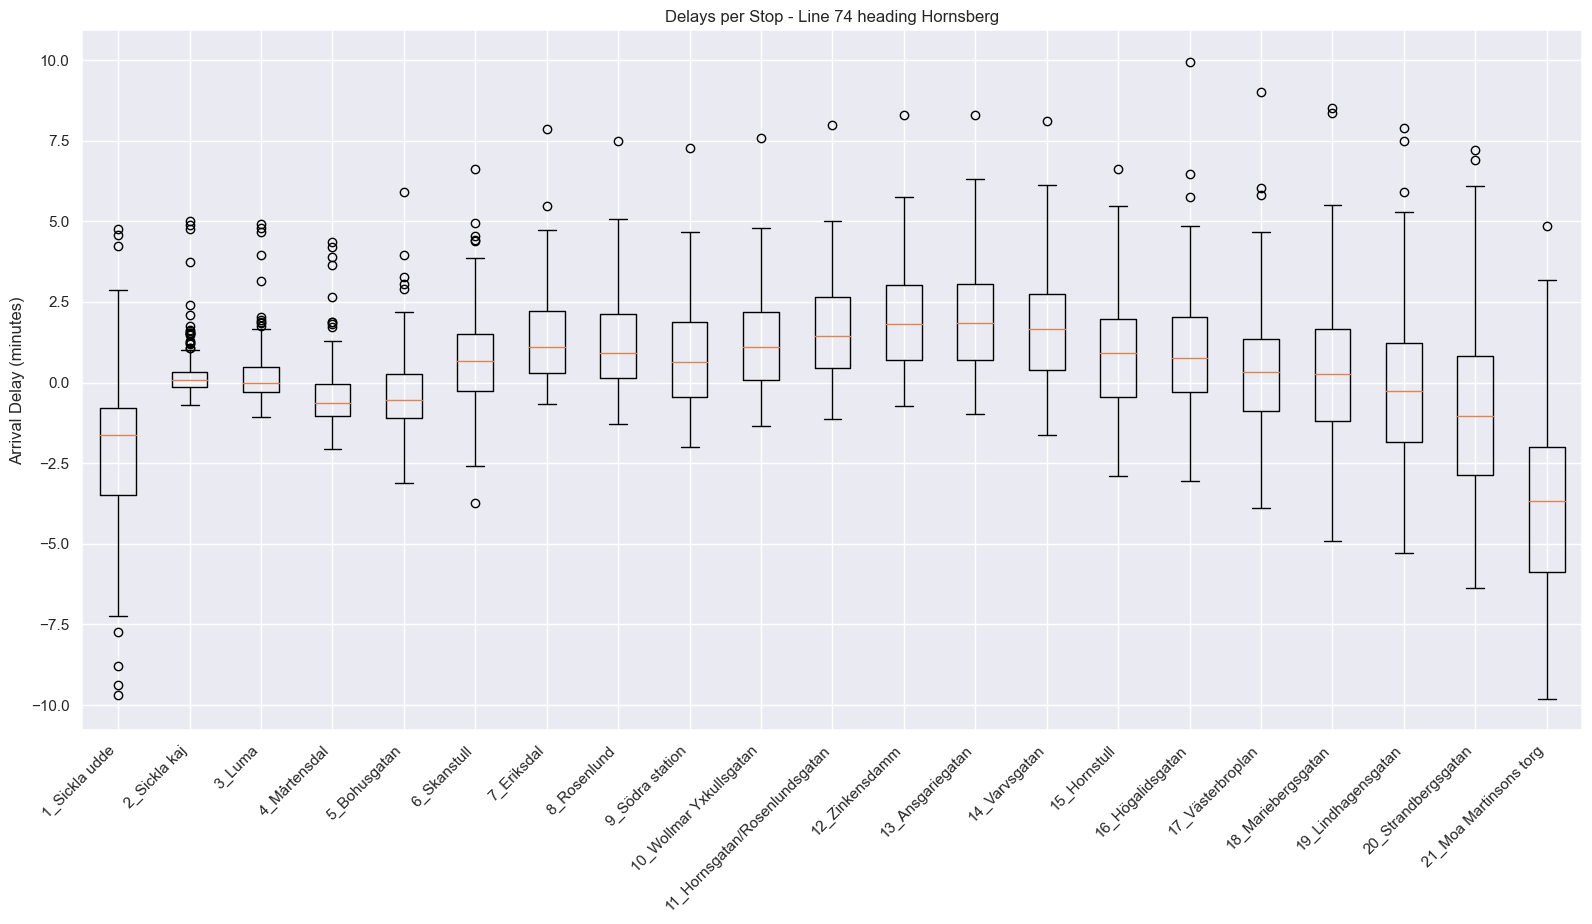

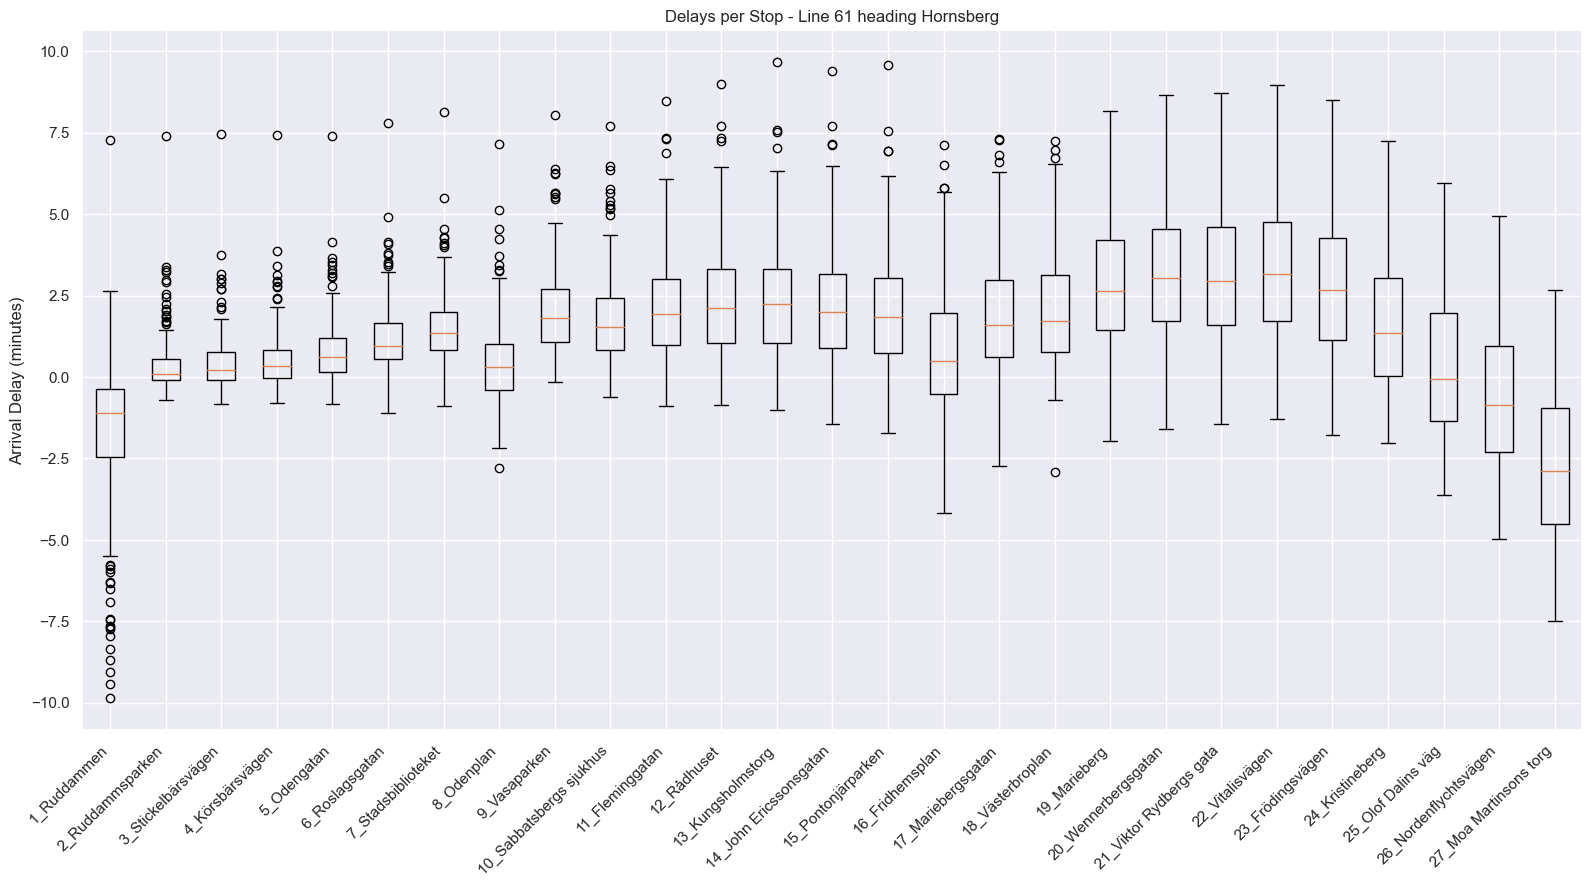

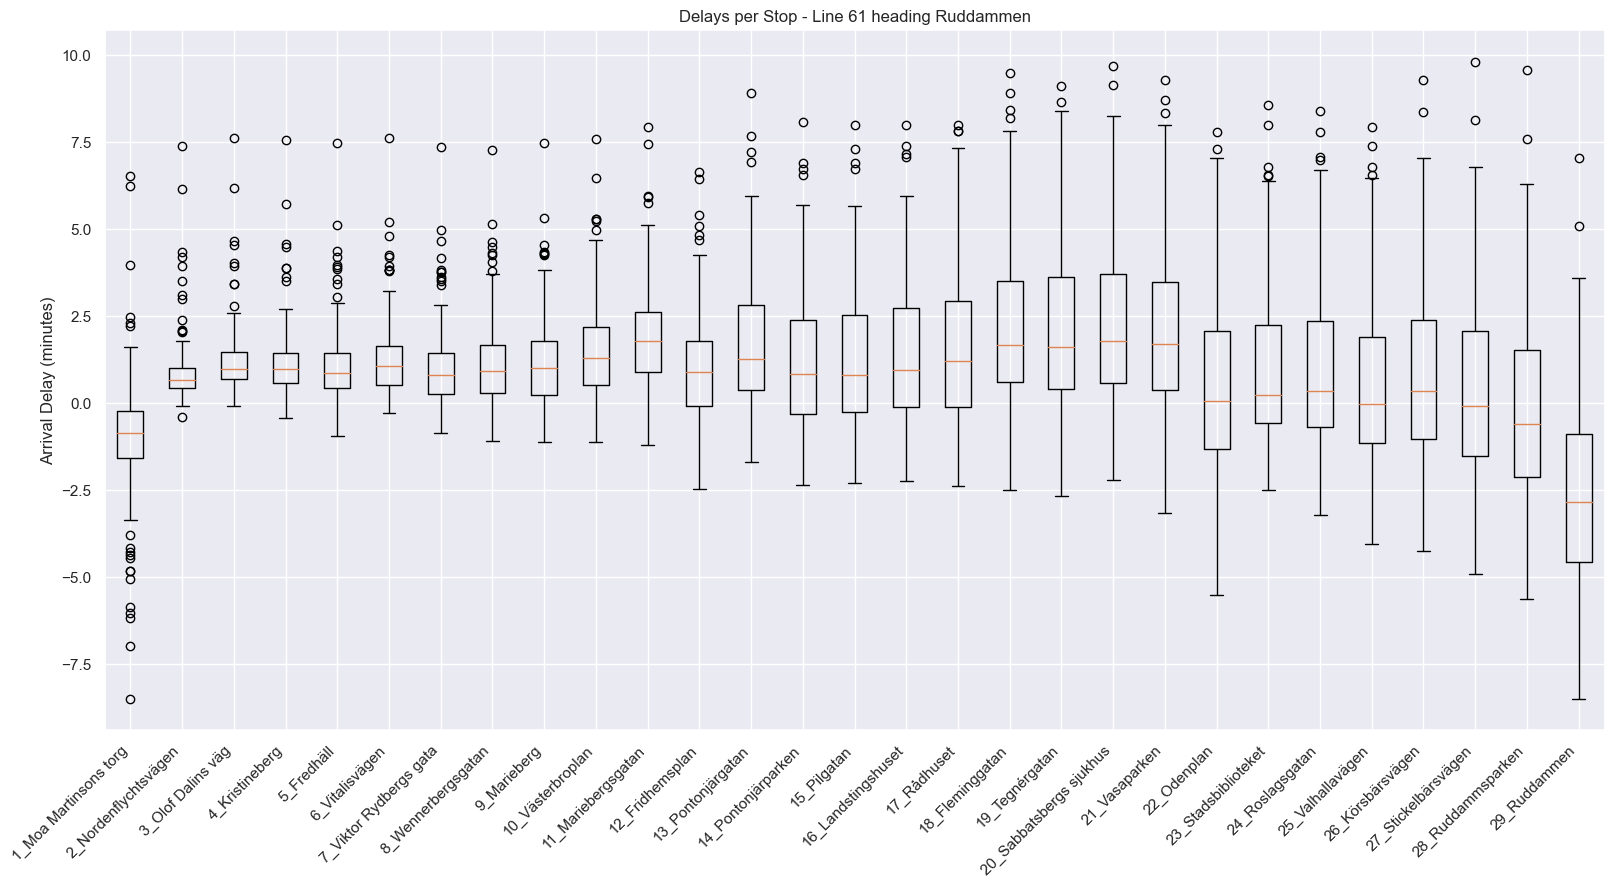

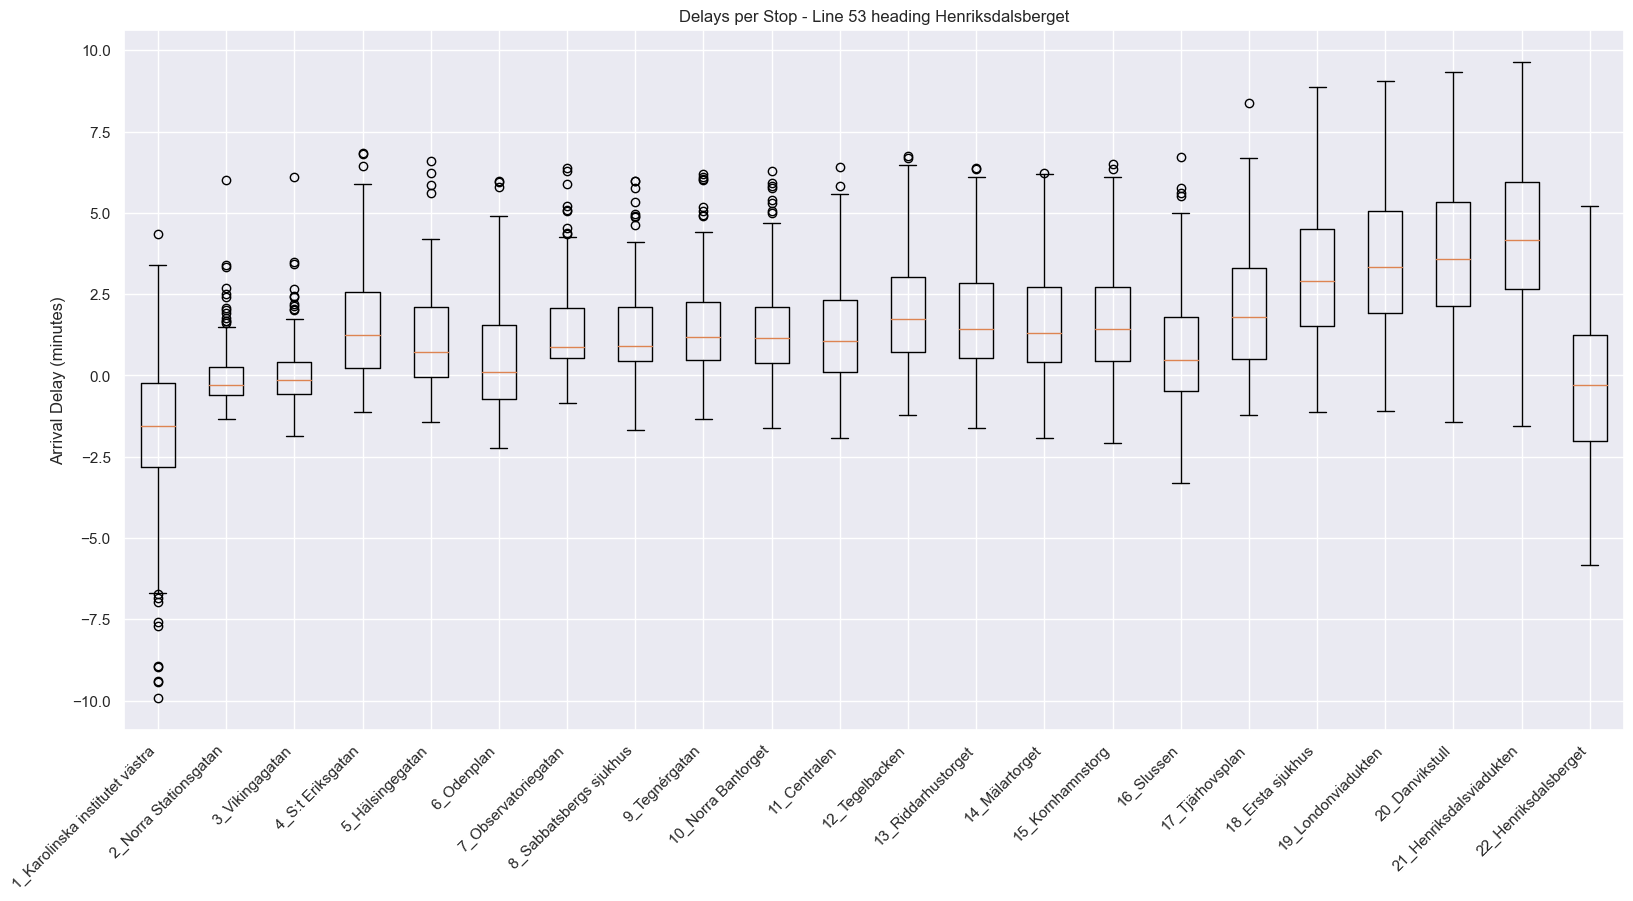

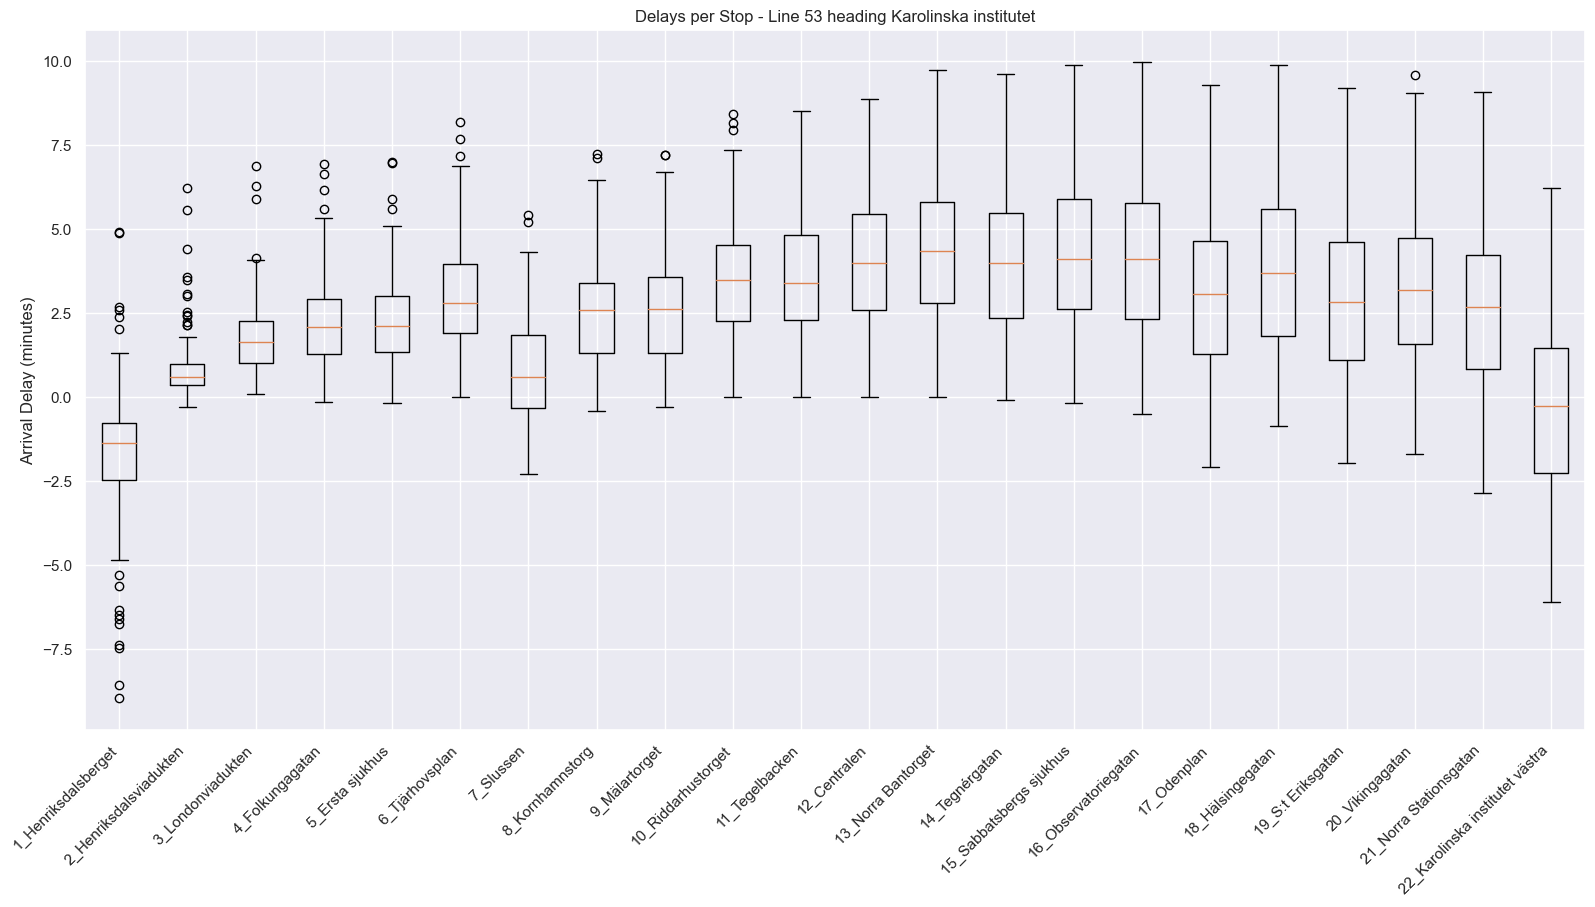

In [113]:
import matplotlib.pyplot as plt

performances_per_lines = {}

for line in df['route_short_name'].unique():
    for dest in df['stop_headsign'].unique():
        subset = df.loc[(df['route_short_name'] == line) & (df['stop_headsign'] == dest)]

        if subset.empty:
            continue

        d = []
        labels = []

        print(line)
        print(dest)
        print(subset['stop_sequence_sched'].unique())

        performances_per_lines[str(line) + dest] = subset

        for stop in sorted(subset['stop_sequence_sched'].unique()):
            stop_subset = subset.loc[subset['stop_sequence_sched'] == stop]
            values = stop_subset['arrival_delay_minutes'].dropna().values

            if len(values) > 0:
                stop_name = stop_subset['stop_name'].iloc[0]
                d.append(values)
                labels.append(f"{stop}_{stop_name}")

        if d:  # ne trace le graphe que s'il y a des données
            fig = plt.figure(figsize=(15, 7))
            ax = fig.add_axes([0, 0, 1, 1])
            bp = ax.boxplot(d)
            ax.set_xticklabels(labels, rotation=45, ha='right')

            ax.set_ylabel("Arrival Delay (minutes)")
            ax.set_title(f"Delays per Stop - Line {line} heading {dest}")

plt.show()


In [105]:
df

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,drop_off_booking_rule_id,stop_name,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time
246,14010000664218434,20250310,0,1,9022001010262001,2025-03-10 06:02:14,-106.0,2025-03-10 06:04:03,3.0,74,...,NaN,Moa Martinsons torg,59.339563,18.004969,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-1.766667,0 days 00:01:49
247,14010000664218434,20250310,0,2,9022001010429004,2025-03-10 06:05:18,-10.0,2025-03-10 06:05:28,0.0,74,...,NaN,Strandbergsgatan,59.337527,18.008290,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-0.166667,0 days 00:00:10
254,14010000664218434,20250310,0,3,9022001010473002,2025-03-10 06:06:53,-10.0,2025-03-10 06:07:11,8.0,74,...,NaN,Lindhagensgatan,59.333497,18.016235,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-17-09Z.pb,-0.166667,0 days 00:00:18
264,14010000664218434,20250310,0,4,9022001010421001,2025-03-10 06:09:12,0.0,2025-03-10 06:09:21,9.0,74,...,NaN,Mariebergsgatan,59.331148,18.023381,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-19-58Z.pb,0.000000,0 days 00:00:09
268,14010000664218434,20250310,0,5,9022001010645001,2025-03-10 06:10:52,18.0,2025-03-10 06:11:04,30.0,74,...,NaN,Västerbroplan,59.327891,18.022024,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-21-35Z.pb,0.300000,0 days 00:00:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33605,14010000664323055,20250313,0,23,9022001010902001,2025-03-14 00:09:40,220.0,2025-03-14 00:09:45,225.0,61,...,NaN,Frödingsvägen,59.330583,18.003085,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,3.666667,0 days 00:00:05
33606,14010000664323055,20250313,0,24,9022001010437002,2025-03-14 00:10:18,166.0,2025-03-14 00:10:22,170.0,61,...,NaN,Kristineberg,59.333213,18.003001,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,2.766667,0 days 00:00:04
33607,14010000664323055,20250313,0,25,9022001010435002,2025-03-14 00:10:49,96.0,2025-03-14 00:10:49,96.0,61,...,NaN,Olof Dalins väg,59.336484,18.004281,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,1.600000,0 days 00:00:00
33608,14010000664323055,20250313,0,26,9022001010433002,2025-03-14 00:10:56,43.0,2025-03-14 00:10:56,43.0,61,...,NaN,Nordenflychtsvägen,59.337646,18.007506,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,0.716667,0 days 00:00:00


In [107]:
len(df['trip_id'].unique())

359